In [3]:
from operator import index

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import classification_report,mean_absolute_error,r2_score,f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree

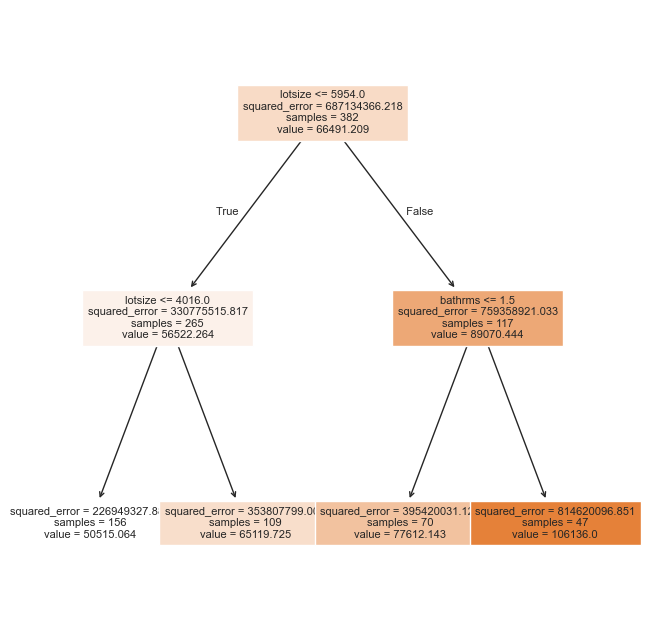

0.3865878044059061

In [17]:
housing=pd.read_csv('Housing.csv')
X=housing.drop('price',axis=1)
y=housing['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform="pandas")
trns=make_column_transformer((ohe,make_column_selector(dtype_include=object)),remainder="passthrough",verbose_feature_names_out=False)
trns=trns.set_output(transform="pandas")
X_train_trns=trns.fit_transform(X_train)
X_test_trns=trns.transform(X_test)
dtr=DecisionTreeRegressor(random_state=25,max_depth=2)
dtr.fit(X_train_trns,y_train)
y_pred=dtr.predict(X_test_trns)
plt.figure(figsize=[8,8])
plot_tree(dtr,feature_names=list(X_train_trns.columns),filled=True,fontsize=8)
plt.show()
r2_score(y_test,y_pred)

In [18]:
y_train.mean()

np.float64(66491.20942408378)

In [19]:
np.mean((y_train-y_train.mean())**2)

np.float64(687134366.2179216)

In [39]:
scores=[]
depths=[None,2,3,4,5,8]
leaves=[1,5,10,20,50]
splits=[2,5,10,20,50]

for d in depths:
    for l in leaves:
        for s in splits:
            dtc=DecisionTreeRegressor(random_state=25,max_depth=d,min_samples_leaf=l,min_samples_split=s)
            dtc.fit(X_train_trns,y_train)
            y_pred=dtc.predict(X_test_trns)
            scores.append([d,l,s,r2_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['depth','leaf','split','score'])
df_scores.sort_values('score',ascending=False)

,depth,leaf,split,score
128,8.0,1,20,0.520188
133,8.0,5,20,0.517948
3,NaN,1,20,0.516177
103,5.0,1,20,0.514985
8,NaN,5,20,0.513971
...,...,...,...,...
2,NaN,1,10,0.344446
126,8.0,1,5,0.339508
1,NaN,1,5,0.286563
125,8.0,1,2,0.282023


In [40]:
best_tree=DecisionTreeRegressor(random_state=25,max_depth=8,min_samples_leaf=1,min_samples_split=20)
X_trf=trns.fit_transform(X)
best_tree.fit(X_trf,y)
df_imp=pd.DataFrame({'feature':list(X_trf.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,feature,imp
6,lotsize,0.509114
8,bathrms,0.214331
4,airco_yes,0.095655
10,garagepl,0.042990
2,fullbase_yes,0.038394
9,stories,0.033116
3,gashw_yes,0.025585
1,recroom_yes,0.016801
7,bedrooms,0.013276
5,prefarea_yes,0.010738


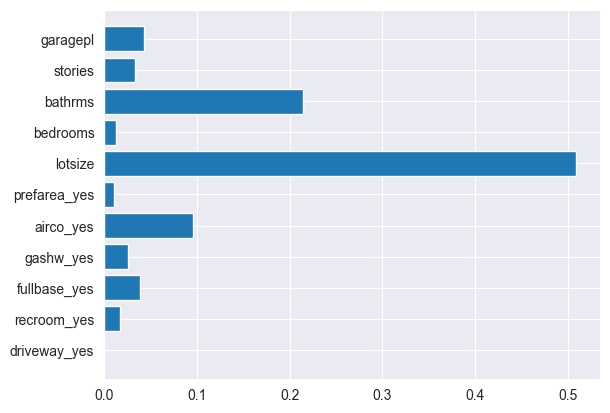

In [41]:
plt.barh(df_imp['feature'],df_imp['imp'])
plt.show()

In [42]:
housing.groupby('bathrms')['price'].mean()

bathrms
1     60153.233831
2     88702.947368
3    104030.000000
4    175000.000000
Name: price, dtype: float64

In [44]:
concrete=pd.read_csv('Concrete_Data.csv')
X=concrete.drop('Strength',axis=1)
y=concrete['Strength']
concrete.dtypes

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)
scores=[]
depths=[None,2,3,4,5]
leaves=[1,5,10,20,50]
splits=[2,5,10,20,50]

for d in depths:
    for l in leaves:
        for s in splits:
            dtc=DecisionTreeRegressor(random_state=25,max_depth=d,min_samples_leaf=l,min_samples_split=s)
            dtc.fit(X_train,y_train)
            y_pred=dtc.predict(X_test)
            scores.append([d,l,s,r2_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['depth','leaf','split','score'])
df_scores.sort_values('score',ascending=False)



,depth,leaf,split,score
0,NaN,1,2,0.812776
1,NaN,1,5,0.809676
2,NaN,1,10,0.803606
6,NaN,5,5,0.787995
5,NaN,5,2,0.787995
...,...,...,...,...
40,2.0,20,2,0.430068
41,2.0,20,5,0.430068
42,2.0,20,10,0.430068
43,2.0,20,20,0.430068


In [51]:
best_tree=DecisionTreeRegressor(random_state=25,max_depth=None,min_samples_leaf=1,min_samples_split=2)
X_trf=trns.fit_transform(X)
best_tree.fit(X_trf,y)
df_imp=pd.DataFrame({'feature':list(X_trf.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,index,feature,imp
0,0,Cement,0.364417
1,7,Age,0.322095
2,1,Blast,0.110349
3,3,Water,0.109552
4,5,Coarse,0.031276
5,4,Superplasticizer,0.025634
6,6,Fine,0.024131
7,2,Fly,0.012546


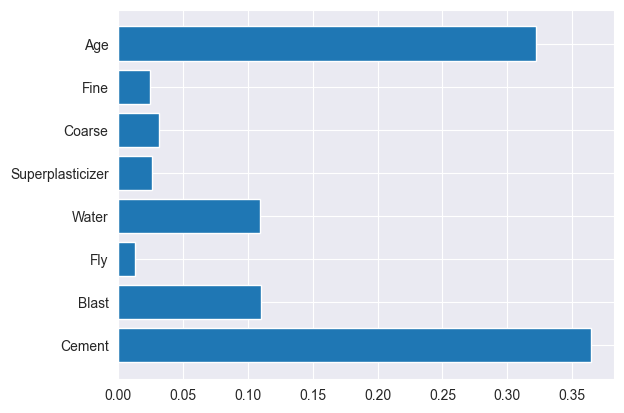

In [55]:
plt.barh(df_imp['feature'],df_imp['imp'])
plt.show()